# Perfiles individuales: `py` vs `jl`

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
ids = np.sort([102, 115, 155, 161, 171, 22, 62, 64, 72, 98])
voidnames = [f'void_py_{idd}.csv' for idd in ids] + [f'void_jl_{idd}.csv' for idd in ids]

In [ ]:
p = {n[5:-4]: pd.read_csv(n, names=["m", "nh","mball", "nhball"]) for n in voidnames}
ppy = {n[5:-4]: pd.read_csv(n, names=["m", "nh","mball", "nhball"]) for n in voidnames[:10]}
pjl = {n[5:-4]: pd.read_csv(n, names=["m", "nh","mball", "nhball"]) for n in voidnames[10:]}

In [ ]:
for k in ppy.keys():
    print(k)
print('---')
for k in pjl.keys():
    print(k)

In [ ]:
## params
RMIN, RMAX, NBINS = 0.0,5.0,50
nk = 100

In [ ]:
def perfiles(p):
    meandenball   = (p.mball/(4*np.pi/3 * (5*RMAX)**3))
    meanhalosball = (p.nhball/(4*np.pi/3 * (5*RMAX)**3))
    
    DR = (RMAX-RMIN)/NBINS
    
    vol    = np.zeros(NBINS)
    volcum = np.zeros(NBINS)
    for k in range(NBINS):
        vol[k]    = ((k+1.0)*DR + RMIN)**3 - (k*DR + RMIN)**3
        volcum[k] = ((k+1.0)*DR + RMIN)**3
    
    vol    *= (4*np.pi/3)
    volcum *= (4*np.pi/3)
    
    Delta    = np.zeros(NBINS)
    DeltaCum = np.zeros(NBINS)
    DeltaHalos    = np.zeros(NBINS)
    DeltaHalosCum = np.zeros(NBINS)
    
    Delta    = (p.m/vol)/meandenball - 1
    DeltaCum = (np.cumsum(p.m)/volcum)/meandenball - 1
    DeltaHalos    = (p.nh/vol)/meanhalosball - 1
    DeltaHalosCum = (np.cumsum(p.nh)/volcum)/meanhalosball - 1

    return pd.DataFrame(np.array([Delta, DeltaCum, DeltaHalos, DeltaHalosCum]).T, columns=["delta", "delta_cum", "deltahalos", "deltahalos_cum"])

In [ ]:
profs_py = [perfiles(pi) for pi in ppy.values()]
profs_jl = [perfiles(pi) for pi in pjl.values()]

In [ ]:
cls = ["delta", "delta_cum", "deltahalos", "deltahalos_cum"]
i,j=1,1
profs_py[i][cls[j]]-profs_jl[i][cls[j]]

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(15,10))
for i in range(10):
    for j,ax in enumerate(axs.flat):
        ax.plot(profs_py[i][cls[j]] - profs_jl[i][cls[j]], label=profs_py[0].columns[j])

axs[0,0].set_title('delta py-jl')
axs[0,1].set_title('deltacum py-jl')
axs[1,0].set_title('halos py-jl')
axs[1,1].set_title('haloscum py-jl')

In [ ]:
### py
mass  = np.zeros(NBINS)
halos = np.zeros(NBINS)
massball  = 0.0
halosball = 0.0

for p in ppy.values():
    mass += p.m
    halos += p.nh
    massball += p.mball
    halosball += p.nhball

meandenball   = (massball/(4*np.pi/3 * (5*RMAX)**3))
meanhalosball = (halosball/(4*np.pi/3 * (5*RMAX)**3))

DR = (RMAX-RMIN)/NBINS

vol    = np.zeros(NBINS)
volcum = np.zeros(NBINS)
for k in range(NBINS):
    vol[k]    = ((k+1.0)*DR + RMIN)**3 - (k*DR + RMIN)**3
    volcum[k] = ((k+1.0)*DR + RMIN)**3

vol    *= (4*np.pi/3)
volcum *= (4*np.pi/3)

Delta    = np.zeros(NBINS)
DeltaCum = np.zeros(NBINS)
DeltaHalos    = np.zeros(NBINS)
DeltaHalosCum = np.zeros(NBINS)

Delta_py    = (mass/vol)/meandenball - 1
DeltaCum_py = (np.cumsum(mass)/volcum)/meandenball - 1
DeltaHalos_py    = (halos/vol)/meanhalosball - 1
DeltaHalosCum_py = (np.cumsum(halos)/volcum)/meanhalosball - 1

In [ ]:
### jl
mass  = np.zeros(NBINS)
halos = np.zeros(NBINS)
massball  = 0.0
halosball = 0.0

for p in pjl.values():
    mass += p.m
    halos += p.nh
    massball += p.mball
    halosball += p.nhball

meandenball   = (massball/(4*np.pi/3 * (5*RMAX)**3))
meanhalosball = (halosball/(4*np.pi/3 * (5*RMAX)**3))

DR = (RMAX-RMIN)/NBINS

vol    = np.zeros(NBINS)
volcum = np.zeros(NBINS)
for k in range(NBINS):
    vol[k]    = ((k+1.0)*DR + RMIN)**3 - (k*DR + RMIN)**3
    volcum[k] = ((k+1.0)*DR + RMIN)**3

vol    *= (4*np.pi/3)
volcum *= (4*np.pi/3)

Delta    = np.zeros(NBINS)
DeltaCum = np.zeros(NBINS)
DeltaHalos    = np.zeros(NBINS)
DeltaHalosCum = np.zeros(NBINS)

Delta_jl    = (mass/vol)/meandenball - 1
DeltaCum_jl = (np.cumsum(mass)/volcum)/meandenball - 1
DeltaHalos_jl    = (halos/vol)/meanhalosball - 1
DeltaHalosCum_jl = (np.cumsum(halos)/volcum)/meanhalosball - 1

In [ ]:
plt.plot((Delta_py-Delta_jl)/abs(Delta_jl)*100)
plt.plot((DeltaCum_py-DeltaCum_jl)/abs(DeltaCum_jl)*100)
plt.plot((DeltaHalos_py-DeltaHalos_jl)/abs(DeltaHalos_jl)*100)
plt.plot((DeltaHalosCum_py-DeltaHalosCum_jl)/abs(DeltaHalosCum_jl)*100)

In [ ]:
colores = ['C0', 'C1', 'C2', 'C3']
fig, axs = plt.subplots(2,2, figsize=(15,10))
for i,key in enumerate(ppy.keys()):
    for j,ax in enumerate(axs.flat):
        ax.plot(profs_py[i][cls[j]], label=key, alpha=0.5)
        ax.legend()

axs[0,0].plot(Delta_py, c='k')
axs[0,1].plot(DeltaCum_py, c='k')
axs[1,0].plot(DeltaHalos_py, c='k')
axs[1,1].plot(DeltaHalosCum_py, c='k')
# axs[0,0].plot(Delta_jl, c='r')

In [ ]:
colores = ['C0', 'C1', 'C2', 'C3']
fig, axs = plt.subplots(2,2, figsize=(15,10))
for i,key in enumerate(pjl.keys()):
    for j,ax in enumerate(axs.flat):
        ax.plot(profs_jl[i][cls[j]], label=key, alpha=0.5)
        ax.legend()

axs[0,0].plot(Delta_jl, c='k')
axs[0,1].plot(DeltaCum_jl, c='k')
axs[1,0].plot(DeltaHalos_jl, c='k')
axs[1,1].plot(DeltaHalosCum_jl, c='k')
# axs[0,0].plot(Delta_jl, c='r')

# Test perfiles de vuelta
Sección lista para implementar! 
Es más fácil correr esta sección en un jupyter

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from astropy.cosmology import LambdaCDM
from astropy.io import fits
import sys
sys.path.append('/home/fcaporaso/FlagShip/profiles/')
sys.path.append('/home/fcaporaso/FlagShip/vgcf/')
from perfiles import lenscat_load
from vgcf import ang2xyz
from tqdm import tqdm
from multiprocessing import Pool
from functools import partial

In [2]:
cosmo = LambdaCDM(H0=100, Om0=0.25, Ode0=0.75)

In [3]:
def tracercat_load(catname='/home/fcaporaso/cats/MICE/mice_sats_18939.fits',
                   if_centrals=True, cosmo=cosmo):
    
        if if_centrals:    
            with fits.open(catname) as f:
                centrals = f[1].data.flag_central == 0
                z_gal   = f[1].data.z_cgal
                mask_z  = (z_gal >= 0.1) & (z_gal <= 0.5)
                mmm = centrals&mask_z
                ra_gal  = f[1].data.ra_gal[mmm]
                dec_gal = f[1].data.dec_gal[mmm]
                z_gal   = z_gal[mmm]
                lmhalo  = f[1].data.lmhalo[mmm]
            
            xh,yh,zh = ang2xyz(ra_gal, dec_gal, z_gal, cosmo=cosmo)
            return xh, yh, zh, lmhalo

        else:
            with fits.open(catname) as f:
                ra_gal  = f[1].data.ra_gal
                dec_gal = f[1].data.dec_gal
                z_gal   = f[1].data.z_cgal
            
            xh,yh,zh = ang2xyz(ra_gal, dec_gal, z_gal, cosmo=cosmo)
            return xh, yh , zh

In [4]:
xh, yh, zh, lmhalo = tracercat_load()

In [18]:
64+32

96

In [46]:
# loading catalog of voids
args = (6.0,9.622,0.2,0.4,-1.0,-0.8,-1.0,0.0)
L,_,nvoids = lenscat_load(*args, 
                         flag=2.0, lensname="/mnt/simulations/MICE/voids_MICE.dat",
                         split=True, NSPLITS=120)
print(nvoids)

3569


In [7]:
def number_density_v2(N, m, xh, yh, zh, lmhalo, rv, xv, yv, zv):
    number_gx = np.zeros(N)
    mass_bin = np.zeros(N)
    vol = np.zeros(N)
    dist = np.sqrt((xh-xv)**2 + (yh-yv)**2 + (zh-zv)**2) ## dist to center of void i
    const = m*rv/N

    mask_mean = (dist < 5*m*rv)
    lmhalo = lmhalo[mask_mean]
    dist = dist[mask_mean]
    
    mass_ball = np.sum( 10.0**(lmhalo) )
    mean_den_ball = mass_ball/((4/3)*np.pi*(5*m*rv)**3)
    
    
    for k in range(N):
        mask = (dist < (k+1)*const) & (dist >= k*const)
        number_gx[k] = mask.sum()
        mass_bin[k] = np.sum( 10.0**(lmhalo[mask]) )
        vol[k] = (k+1)**3 - k**3
    
    vol *= (4/3)*np.pi*const**3
    
    return number_gx, mass_bin, vol, np.full_like(vol, mean_den_ball)

In [48]:
N,m = 25, 10

partial_func = partial(number_density_v2, N, m, xh, yh, zh, lmhalo)
def partial_func_unpack(A):
    return partial_func(*A)

In [49]:
P = np.zeros((nvoids, 4, N))

for i,Li in enumerate(tqdm(L)):
    num=len(Li)
    entrada = np.array([Li.T[1], Li.T[5], Li.T[6], Li.T[7]]).T
    with Pool(processes=num) as pool:
        res = pool.map(partial_func_unpack,
                       entrada)
        pool.close()
        pool.join()
    P[i*num:(i+1)*num] = res

100%|█| 30/30 [15:10<00:00, 30.


In [42]:
h = fits.Header()
h.append(('Nvoids', int(nvoids)))
h.append(('Rv_min', args[0]))
h.append(('Rv_max', args[1]))
h.append(('z_min', args[2]))
h.append(('z_max', args[3]))
h.append(('rho1_min', args[4]))
h.append(('rho1_max', args[5]))
h.append(('rho2_min', args[6]))
h.append(('rho2_max', args[7]))
h.append(('rmax', m))

primary_hdu = fits.PrimaryHDU(header=h)
hdul = fits.HDUList([primary_hdu])

r_ad = np.linspace(0,m,N+1)
r_ad = r_ad[:-1]+np.diff(r_ad)*0.5

for p in P:
    r_v = (3*p[2][0]/(4*np.pi))**(1/3)*(N/m)
    table = np.array([fits.Column(name='r_phys', format='E', array=r_v*r_ad),
                     fits.Column(name='nhalos', format='E', array=p[0]),
                     fits.Column(name='mass', format='E', array=p[1]),
                     fits.Column(name='vol_phys', format='E', array=p[2]),
                     fits.Column(name='mean_mass', format='E', array=p[3]),
                     ])
    tbhdu = fits.BinTableHDU.from_columns(table)
    hdul.append(tbhdu)
    
if args[7]<=0:
    t = 'R'
elif args[6]>=0:
    t = 'S'
else:
    t = 'all'
    
hdul.writeto(f'TEST_allz_denprof_mice_Rv{args[0]}-{args[1]}_z0{int(10*args[2])}-0{int(10*args[3])}_type{t}.fits')

/tmp/ipykernel_80154/459383096.py:7: RuntimeWarning: invalid value encountered in divide
  plt.plot(rrr, np.nanmean((P[:,1,:]/P[:,2,:])/P[:,-1,:] - 1, axis=0), c='r', label='Mean')
/tmp/ipykernel_80154/459383096.py:8: RuntimeWarning: invalid value encountered in divide
  plt.plot(rrr, np.nanmedian((P[:,1,:]/P[:,2,:])/P[:,-1,:] - 1, axis=0), c='b', label='Median')


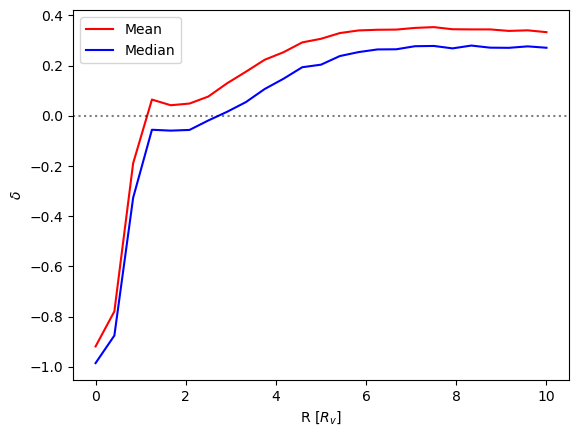

In [50]:
rrr = np.linspace(0,m,N)

# plt.figure(figsize=(7,5))
# for i in range(nvoids):
#     plt.plot(rrr, (P[i][1]/P[i][2])/P[i][-1] - 1, c='k', alpha=0.05)
    
plt.plot(rrr, np.nanmean((P[:,1,:]/P[:,2,:])/P[:,-1,:] - 1, axis=0), c='r', label='Mean')
plt.plot(rrr, np.nanmedian((P[:,1,:]/P[:,2,:])/P[:,-1,:] - 1, axis=0), c='b', label='Median')
# plt.ylim(-1.05,0.6)
plt.axhline(0,ls=':',c='k',alpha=0.5)
plt.legend()
plt.xlabel(r'R [$R_v$]')
plt.ylabel(r'$\delta$')
plt.show()


## Test of `density_profiles_v2.py`

In [1]:
from density_profiles_v2 import *

# of gx:  329004990


In [ ]:
P = main(lens_args=(6.0,9.622,0.2,0.4,-1.0,-0.8,-1.0,100), N=50, ncores=32)

In [50]:
mean_n_box = 329004990/(3072**3)
print(mean_n_box)

0.011348510161042213


In [61]:
NTRAC = 4096**3
LBOX = 3072
mean_n_box = NTRAC/(LBOX**3)
print(NTRAC)
print(mean_n_box)

68719476736
2.3703703703703702


In [45]:
n_cum = np.cumsum(P[:96][:,0], axis=1)
vol_cum = np.cumsum(P[:96][:,2],axis=1)

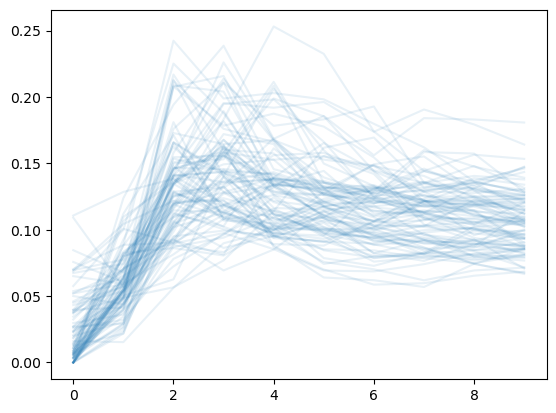

In [65]:
plt.plot((P[:96][:,0].T/P[:96][:,2].T), c='C0', alpha=0.1)
plt.show()

? ^ es muy chico los valores comparado con la den media de la simu...
capaz q usar la de una tajada?

In [ ]:
mass = P[:96][:,1]
mass_cum = np.cumsum(P[:96][:,1],axis=1)
vol = P[:96][:,2]
vol_cum = np.cumsum(P[:96][:,2],axis=1)
density_contrast = (mass.T/vol.T)/P[:96][:,-1].T - 1
density_contrast_cum = (mass_cum.T/vol_cum.T)/P[:96][:,-1].T - 1

plt.figure(figsize=(6,8))
plt.axhline(0, ls=':', c='gray')
plt.plot(density_contrast,
         c='C0',alpha=0.1)
plt.plot(np.mean(density_contrast,axis=1), c='C0', label='Normal')

plt.plot(density_contrast_cum,
         c='C1',alpha=0.1)
plt.plot(np.mean(density_contrast_cum,axis=1), c='C1', label='Cumulative')
plt.legend()
plt.show()

## Using numba ...?

In [17]:
from numba import njit
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import LambdaCDM
from astropy.io import fits
from functools import partial
from multiprocessing import Pool
from tqdm import tqdm
import sys
sys.path.append('/home/fcaporaso/FlagShip/profiles/')
from perfiles import lenscat_load

In [5]:
cosmo = LambdaCDM(H0=100, Om0=0.25, Ode0=0.75)

In [56]:
def tracercat_load(catname='mice_sats_18939.fits', if_centrals=True):
    
    with fits.open('/home/fcaporaso/cats/MICE/'+catname) as f:
        ra_gal  = f[1].data.ra_gal.astype('f')
        dec_gal = f[1].data.dec_gal.astype('f')
        z_gal   = f[1].data.z_cgal.astype('f')
        centrals = f[1].data.flag_central == 0
        lmhalo = f[1].data.lmhalo.astype('f')
        
    if if_centrals:
        return ra_gal[centrals], dec_gal[centrals], z_gal[centrals], lmhalo[centrals]
    
    return ra_gal, dec_gal, z_gal

In [75]:
def ang2xyz(ra, dec, comdist):

    x = comdist * np.cos(np.deg2rad(dec)) * np.cos(np.deg2rad(ra))
    y = comdist * np.cos(np.deg2rad(dec)) * np.sin(np.deg2rad(ra))
    z = comdist * np.sin(np.deg2rad(dec))

    return x,y,z

In [31]:
@njit
def density_v2(N, m, xh, yh, zh, lmhalo, void_prop):
    rv = void_prop[0]
    xv = void_prop[1]
    yv = void_prop[2]
    zv = void_prop[3]
    number_gx = np.zeros(N)
    mass_bin = np.zeros(N)
    vol = np.zeros(N)
    dist = np.sqrt((xh-xv)**2 + (yh-yv)**2 + (zh-zv)**2) ## dist to center of void i
    const = m*rv/N

    for k in range(N):
        mask = (dist < (k+1)*const) & (dist >= k*const)
        number_gx[k] = mask.sum()
        mass_bin[k] = np.sum( 10.0**(lmhalo[mask]) )
        vol[k] = (k+1)**3 - k**3
        
    mask_mean = (dist < 5*m*const)
    mass_ball = np.sum( 10.0**(lmhalo[mask_mean]) )
    mean_den_ball = mass_ball/((4/3)*np.pi*(5*m*const)**3)
    
    vol *= (4/3)*np.pi*const**3
    
    return number_gx, mass_bin, vol, np.full_like(vol, mean_den_ball)


In [57]:
ra_gal, dec_gal, z_gal, lmhalo = tracercat_load()

CPU times: user 13.9 s, sys: 2.21 s, total: 16.1 s
Wall time: 16.1 s


In [63]:
comdist = cosmo.comoving_distance(z_gal).value

CPU times: user 3min 20s, sys: 664 ms, total: 3min 21s
Wall time: 3min 21s


In [74]:
xh, yh, zh = ang2xyz(ra_gal, dec_gal, comdist)

CPU times: user 14 s, sys: 441 ms, total: 14.5 s
Wall time: 14.4 s


In [76]:
del ra_gal, dec_gal, z_gal

In [77]:
lens_args=(6.0,9.0,0.2,0.3,-1.0,-0.8,0.0,100)
ncores=128
N=10
m=5

In [88]:
L,_,nvoids = lenscat_load(*lens_args, 
                          flag=2.0, lensname="/mnt/simulations/MICE/voids_MICE.dat",
                          split=False, NSPLITS=1)

In [89]:
partial_func = partial(density_v2, N, m, xh, yh, zh, lmhalo)

In [26]:
P = np.zeros((nvoids, 4, N)) # 4=num de arr q devuelve density_v2
for i,Li in enumerate(tqdm(L)):
    num = len(Li)
    print(num)
    entrada = np.array([Li.T[1], Li.T[5], Li.T[6], Li.T[7]]).T
    with Pool(processes=num) as pool:
        resmap = pool.map(partial_func,
                          entrada)
        pool.close()
        pool.join()
    for j,res in enumerate(resmap):
        P[i*num + j] = res

  0%|                                                                                  | 0/18 [00:00<?, ?it/s]

128


Process ForkPoolWorker-83:
Process ForkPoolWorker-123:
Process ForkPoolWorker-151:
Process ForkPoolWorker-152:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/fcaporaso/miniconda3/envs/env_py39/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/fcaporaso/miniconda3/envs/env_py39/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/fcaporaso/miniconda3/envs/env_py39/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/fcaporaso/miniconda3/envs/env_py39/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/fcaporaso/miniconda3/envs/env_py39/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/fcaporaso/miniconda3/envs/env_py39/lib/python3.10/multiprocessing/process.py", line 108, in

UnpicklingError: invalid load key, '\xe4'.

Process ForkPoolWorker-41:
Traceback (most recent call last):
  File "/home/fcaporaso/miniconda3/envs/env_py39/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/fcaporaso/miniconda3/envs/env_py39/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/fcaporaso/miniconda3/envs/env_py39/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/fcaporaso/miniconda3/envs/env_py39/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/home/fcaporaso/miniconda3/envs/env_py39/lib/python3.10/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt


## Extra tests

In [1]:
import numpy as np

In [6]:
from density_profiles_v2 import *

In [2]:
P = np.zeros((1000,4,10))

In [8]:
lens_args=(6.0,9.0,0.2,0.3,-1.0,-0.8,0.0,100)
L,_,nvoids = lenscat_load(*lens_args, flag=2, lensname='/mnt/simulations/MICE/voids_MICE.dat', split=False)

In [12]:
l = L.T[0]

In [13]:
cosmo = LambdaCDM(H0=100, Om0=0.25, Ode0=0.75)

In [14]:
ra_gal, dec_gal, z_gal, lmhalo = tracercat_load()    
xh, yh, zh = ang2xyz(ra_gal, dec_gal, z_gal, cosmo=cosmo)
print('# of gx: ', len(ra_gal))

# of gx:  329004990


In [16]:
N,m = 10,5
P[0] = density_v2(N, m, xh, yh, zh, lmhalo, void_prop=(l[1],l[5],l[6],l[7]))

In [17]:
print(P[0])

[[1.00000000e+00 1.11000000e+02 7.91000000e+02 2.25200000e+03
  2.33500000e+03 3.09500000e+03 3.88300000e+03 5.21700000e+03
  7.40100000e+03 9.65100000e+03]
 [2.76375613e+10 1.17045681e+13 1.21037228e+14 8.04735540e+14
  4.58196909e+14 6.29244518e+14 7.54927945e+14 1.17534277e+15
  1.68822722e+15 2.20708598e+15]
 [2.88473864e+02 2.01931705e+03 5.48100341e+03 1.06735330e+04
  1.75969057e+04 2.62511216e+04 3.66361807e+04 4.87520830e+04
  6.25988284e+04 7.81764171e+04]
 [2.10947439e+10 2.10947439e+10 2.10947439e+10 2.10947439e+10
  2.10947439e+10 2.10947439e+10 2.10947439e+10 2.10947439e+10
  2.10947439e+10 2.10947439e+10]]


In [27]:
r_v = (P[0][2][0]*3/(4*np.pi))**(1/3) * (N/m) 

In [24]:
P[0][2][0]

288.47386377784187

In [28]:
print(r_v)
print(l[1])

8.1979
8.1979


In [30]:
lensname="/mnt/simulations/MICE/voids_MICE.dat"
lensname.split('/')[-1][:-4]

'voids_MICE'

# Probando con class

In [1]:
from density_profiles_class import *

In [2]:
test = Void(
    lens_args={'Rv_min':6.0, 'Rv_max':9.622, 'z_min':0.2, 'z_max':0.4,
               'rho1_min':-1.0, 'rho1_max':-0.8, 'rho2_min':-1.0, 'rho2_max':100.0},
    N=50, m=5, ncores=64,
)

In [3]:
test.load_voidcat()

In [4]:
test.nvoids

11598

In [ ]:
test.load_gxcat()

In [ ]:
test.ngx

In [ ]:
test.stacking()